In [ ]:
# Colab
from google.colab import files
import io

# Data manipulation
import json 
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from bokeh.io import output_file, show, output_notebook
from bokeh.models import GeoJSONDataSource,LinearColorMapper,HoverTool,CustomJS,Dropdown,RadioButtonGroup
from bokeh.plotting import figure
from bokeh.palettes import Viridis6,Turbo256, Category20
from bokeh.layouts import column, row

# Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [ ]:
# Upload CSV file and store in a Pandas DataFrame
uploaded_csv = files.upload()
df = pd.read_csv(io.BytesIO(uploaded_csv['data9_5.csv']))
df = df.apply(pd.to_numeric, errors='raise')
df.describe().T

Saving data9_5.csv to data9_5 (1).csv


,count,mean,std,min,25%,50%,75%,max
x,1822.0,14318.318960,4450.336240,4353.04,11199.446250,15754.370000,17736.025000,20372.325
y,1822.0,8808.108052,1646.446921,4689.62,7292.351250,9149.445000,10142.066250,11489.740
prox,1822.0,0.077586,0.118632,0.00,0.021277,0.042553,0.085106,1.000
Avail,1822.0,0.189644,0.202059,0.00,0.082569,0.091743,0.275229,1.000
pop,1822.0,90.288145,72.986325,5.00,35.000000,75.000000,125.000000,720.000
changing,1822.0,0.880716,0.102079,0.00,0.832168,0.902098,0.958042,1.000
access,1822.0,13.194292,20.004931,0.00,0.000000,10.000000,15.000000,285.000
div-1,1822.0,0.227772,1.155289,0.00,0.000000,0.000000,0.000000,10.000
div-2,1822.0,58.057080,28.453861,0.00,40.000000,60.000000,80.000000,100.000
div-3,1822.0,8.918771,9.587024,0.00,0.000000,10.000000,10.000000,70.000


In [ ]:
# Extract coords from data
df_coords = df[['x', 'y']]

df_data   = df.drop(['x', 'y','access' ,'pop','prox','Avail','div-4'], axis=1)

# Scale data
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(
    scaler.fit_transform(df_data),
    columns=df_data.columns
)

In [ ]:
def map_clustering_results(coords, model):
    labels = model.labels_
    for label in np.unique(labels):
        x = coords['x'].to_numpy()[labels == label]
        y = coords['y'].to_numpy()[labels == label]
        plt.scatter(x, y, label=model.labels_)

In [ ]:
km_model = KMeans(
    n_clusters = 4
)

In [ ]:
km_model.fit(scaled_df)

KMeans(n_clusters=4)

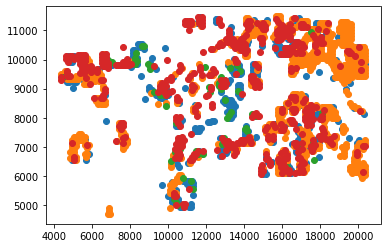

In [ ]:
map_clustering_results(df_coords, km_model)

In [ ]:
df_cluster = pd.DataFrame(km_model.labels_)

In [ ]:
df_cluster.describe()

,0
count,3459.000000
mean,1.721885
std,1.417324
min,0.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,4.000000


In [ ]:
df_cluster.to_csv('data9_output_3_3.csv')
files.download('data9_output_3_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_cluster0 = df.loc[df_cluster[0]==0]
df_cluster1 = df.loc[df_cluster[0]==1]
df_cluster2 = df.loc[df_cluster[0]==2]
df_cluster3 = df.loc[df_cluster[0]==3]
df_cluster4 = df.loc[df_cluster[0]==4]


In [ ]:
df_cluster0.describe().T

,count,mean,std,min,25%,50%,75%,max
x,467.0,13862.703619,3788.208952,4662.650000,10561.530000,14496.115000,16937.095000,20406.67500
y,467.0,8571.416617,1502.210530,4933.800000,7320.700000,8599.970000,9836.787500,11493.02000
prox,467.0,0.881527,0.090116,0.000000,0.846154,0.884615,0.923077,1.00000
Avail,467.0,0.118789,0.095912,0.000000,0.072993,0.072993,0.197080,0.40146
pop,467.0,89.603854,88.984516,0.000000,10.000000,70.000000,140.000000,415.00000
changing,467.0,0.926854,0.072640,0.661224,0.885714,0.942857,0.991837,1.00000
access,467.0,7.205567,10.611989,0.000000,0.000000,0.000000,10.000000,65.00000
div-1,467.0,0.396146,1.537593,0.000000,0.000000,0.000000,0.000000,10.00000
div-2,467.0,14.561028,13.583710,0.000000,0.000000,10.000000,30.000000,40.00000
div-3,467.0,4.946467,6.851218,0.000000,0.000000,0.000000,10.000000,50.00000


In [ ]:
df_cluster1.describe().T

,count,mean,std,min,25%,50%,75%,max
x,576.0,11300.721710,1465.460340,5532.435000,10347.640000,11541.100000,12321.15250,13701.745
y,576.0,9282.612925,1529.740187,6639.080000,7550.705000,9812.080000,10523.85000,11574.770
prox,576.0,0.996998,0.009479,0.937500,1.000000,1.000000,1.00000,1.000
Avail,576.0,0.718268,0.100799,0.554745,0.642336,0.715328,0.79562,1.000
pop,576.0,167.508681,97.352340,5.000000,100.000000,160.000000,220.00000,1225.000
tim,576.0,23.451215,13.629328,0.700000,14.000000,22.400000,30.80000,171.500


In [ ]:
df_cluster2.describe().T

,count,mean,std,min,25%,50%,75%,max
x,889.0,11253.279899,2943.828260,4733.050000,9162.485000,11794.84500,13478.935000,16842.085000
y,889.0,8729.626564,1784.081436,4914.130000,7312.320000,9096.31500,10123.080000,11517.495000
prox,889.0,0.984814,0.023869,0.895833,0.979167,1.00000,1.000000,1.000000
Avail,889.0,0.398504,0.082837,0.218978,0.335766,0.40146,0.452555,0.569343
pop,889.0,145.776153,87.705450,5.000000,75.000000,135.00000,200.000000,640.000000
tim,889.0,20.408661,12.278763,0.700000,10.500000,18.90000,28.000000,89.600000


In [ ]:
df_cluster3.describe().T

,count,mean,std,min,25%,50%,75%,max
x,28.0,7555.400714,218.901297,6707.03,7512.155000,7616.1800,7660.016250,7832.420000
y,28.0,7400.569107,281.531767,6917.45,7206.565000,7367.1075,7637.800000,7887.170000
prox,28.0,0.172619,0.066090,0.00,0.119792,0.1875,0.229167,0.270833
Avail,28.0,0.000000,0.000000,0.00,0.000000,0.0000,0.000000,0.000000
pop,28.0,48.392857,28.416661,5.00,30.000000,50.0000,61.250000,130.000000
tim,28.0,6.775000,3.978333,0.70,4.200000,7.0000,8.575000,18.200000


In [ ]:
df_cluster4.describe().T

,count,mean,std,min,25%,50%,75%,max
x,1548.0,14154.260371,4749.976641,4353.040,10565.626250,15964.060000,17919.145000,20406.675000
y,1548.0,8748.588346,1599.792868,5497.285,7245.273750,8952.002500,10137.010000,11499.580000
prox,1548.0,0.962923,0.036197,0.875,0.937500,0.979167,1.000000,1.000000
Avail,1548.0,0.115921,0.060975,0.000,0.072993,0.072993,0.145985,0.277372
pop,1548.0,87.257752,64.257653,0.000,40.000000,75.000000,120.000000,485.000000
tim,1548.0,12.216085,8.996071,0.000,5.600000,10.500000,16.800000,67.900000
